### Demo NSGA-II com pymoo usando o problema ZDT1 (bi-objetivo). Mostra a evolução e plota a frente de Pareto Final.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from pymoo.problems import get_problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.termination import get_termination
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

In [12]:
def run_nsga2(seed=1, pop_size=100, n_gen=200):
    problem = get_problem("zdt1")
    algorithm = NSGA2(pop_size=pop_size)
    termination = get_termination("n_gen", n_gen)

    res = minimize(problem, algorithm, termination, seed = seed, save_history=True, verbose=True)
    return res

In [13]:
def plot_pareto(res):
    F = res.F
    if F.shape[1] != 2:
        raise ValueError("Este plot espera 2 objetivos.")
    
    plt.figure(figsize=(6,5))
    plt.scatter(F[:,0], F[:,1], s=20)
    plt.xlabel("f1")
    plt.ylabel("f2")
    plt.title("Fronteira de Pareto obtida (NSGA-II)")
    plt.grid(True)
    plt.gca().invert_xaxis() if False else None
    plt.show()

In [14]:
def plot_history_fronts(res):
    history = res.history
    seq = []
    for entry in history:
        try:
            X = entry.opt.get("F")
            seq.append(X)
        except Exception:
            pass

    fig, ax = plt.subplots(figsize=(6,5))
    for i, F in enumerate(seq[::max(1, len(seq)//8)]):
        ax.scatter(F[:,0], F[:,1], s=8, alpha=0.6, label=f"gen {i*(len(seq)//8):d}")
    ax.set_xlabel("f1")
    ax.set_ylabel("f2")
    ax.set_title("Evolução das frentes ao longo das gerações")
    ax.legend()
    ax.grid(True)
    plt.show()

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv     
     1 |      100 |     13 |  2.6453036232 |  2.7299591654 |  0.000000E+00
     2 |      200 |     16 |  2.5955994878 |  2.6785100621 |  0.000000E+00
     3 |      300 |     13 |  1.9852209365 |  2.8235002245 |  0.000000E+00
     4 |      400 |     11 |  1.8499811195 |  2.7000463453 |  0.000000E+00
     5 |      500 |     19 |  1.6221815550 |  2.3785245844 |  0.000000E+00
     6 |      600 |     19 |  1.4528154963 |  2.1170647720 |  0.000000E+00
     7 |      700 |     16 |  1.4192498499 |  2.1112999894 |  0.000000E+00
     8 |      800 |     14 |  1.1641047814 |  1.5443637571 |  0.000000E+00
     9 |      900 |     23 |  1.1587864150 |  1.6382814999 |  0.000000E+00
    10 |     1000 |     14 |  1.1224786733 |  1.2754012035 |  0.000000E+00
    11 |     1100 |     16 |  1.0184876588 |  1.2970984377 |  0.000000E+00
    12 |     1200 |     15 |  0.9373972213 |  1.3012167866 |  0.000000E+00
    13 |     1300 |     1

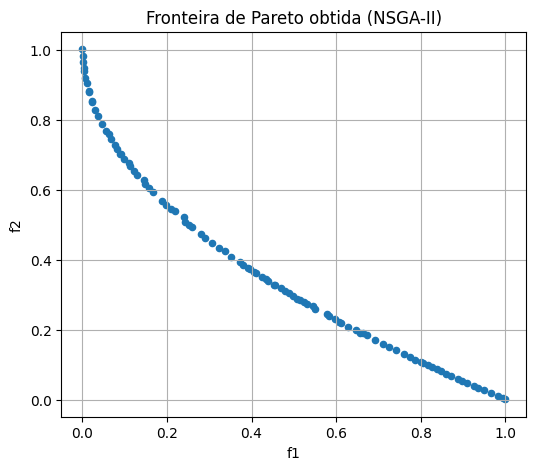

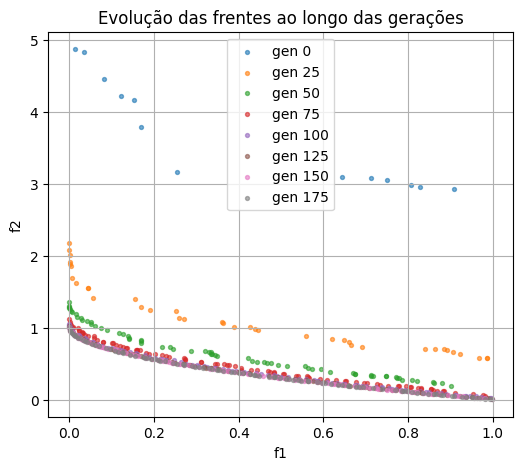

In [18]:
if __name__ == "__main__":
    res = run_nsga2(seed=42, pop_size=100, n_gen=200)
    print("Número de soluções na fronte final: ", res.F.shape[0])
    print("Exemplo - primeiros 5 pontos da fronte (f1, f2):\n", res.F[:5])
    plot_pareto(res)
    plot_history_fronts(res)